In [3]:
from __future__ import absolute_import, division, print_function
%tensorflow_version 2.x
import tensorflow as tf

TensorFlow 2.x selected.


In [4]:
# Tensors in TensorFlow are immutable stateless objects.

# Usigng Python state
x = tf.zeros([10, 10])
x += 2 # Does not mutate the original value of x
print(x)

tf.Tensor(
[[2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]], shape=(10, 10), dtype=float32)


In [0]:
# TensorFlow has stateful operations built-in,
# and these are often easier than using low-level
# Python representation for our state.
# Use tf.Variable to represent weights in a model.

# A tf.Variable objects stores a value and implicitly reads from
# this value. There are operations (tf.assign_sub, tf.scatter_update)
# that manipulate the value stored in a TensorFlow variable.
v = tf.Variable(1.0)
# Use Python's `assert` as a debugging statement to test the condition
assert v.numpy() == 1.0

# Reassign the value `v`
v.assign(3.0)
assert v.numpy() == 3.0

# Use `v` in a TensorFlow `tf.square()` operation and reassign
v.assign(tf.square(v))
assert v.numpy() == 9.0

Computing using `tf.Variable` are automatically traced when computing gradients. For variables that representation embeddings, TensorFlow will do sparse updates by default, which are more computation and memory efficient.

A `tf.Variable` is also a way to show a reader of your code that a piece of state is mutable.

In [0]:
# Define model
# encapsulate the variable and the computation
class Model(object):
  
  def __init__(self):
    # Initialize the weights to `5.0` and the bias to `0.0`
    # In practice, these should be initialized to random values 
    # (for example, with `tf.random.normal`)
    self.W = tf.Variable(5.0)
    self.b = tf.Variable(0.0)
  
  def __call__(self, x):
    return self.W * x + self.b

In [0]:
model = Model()

assert model(3.0).numpy() == 15.0

In [0]:
def loss(predicted_y, target_y):
  return tf.reduce_mean(tf.square(predicted_y - target_y))

In [0]:
# First, synthesize the training data
# by adding random Gaussian (Normal) noise to the inputs:
TRUE_W = 3.0
TRUE_b = 2.0
NUM_EXAMPLES = 1000

inputs = tf.random.normal(shape=[NUM_EXAMPLES])
noise = tf.random.normal(shape=[NUM_EXAMPLES])
outputs = inputs * TRUE_W + TRUE_b + noise

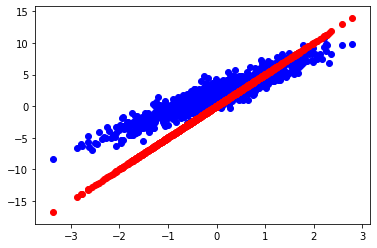

Current loss: 9.217091


In [15]:
# Before training the model, visualize the loss value
# by plotting the model's predictions in red
# and the training data in blue:
import matplotlib.pyplot as plt

plt.scatter(inputs, outputs, c='b')
plt.scatter(inputs, model(inputs), c='r')
plt.show()

print('Current loss: %1.6f' % loss(model(inputs), outputs).numpy())

In [0]:
# Define a training loop
def train(model, inputs, outputs, learning_rate):
  with tf.GradientTape() as tape:
    current_loss = loss(model(inputs), outputs)
  dW, db = tape.gradient(current_loss, [model.W, model.b])
  model.W.assign_sub(learning_rate * dW) # tf.assign + tf.sub
  model.b.assign_sub(learning_rate * db)

In [20]:
# Repeatedly run through the training data and see how W and b evolve.
model = Model()

# Collect the history of W-values and b-values to plot later
Ws, bs = [], []
epochs = range(10)
for epoch in epochs:
  Ws.append(model.W.numpy())
  bs.append(model.b.numpy())
  current_loss = loss(model(inputs), outputs)

  train(model, inputs, outputs, learning_rate=0.1)
  print('Epoch %2d: W=%1.2f b=%1.2f, loss=%2.5f' %
        (epoch, Ws[-1], bs[-1], current_loss))

Epoch  0: W=5.00 b=0.00, loss=9.21709
Epoch  1: W=4.58 b=0.41, loss=6.16095
Epoch  2: W=4.25 b=0.73, loss=4.23819
Epoch  3: W=3.99 b=0.99, loss=3.02848
Epoch  4: W=3.78 b=1.20, loss=2.26737
Epoch  5: W=3.62 b=1.36, loss=1.78851
Epoch  6: W=3.49 b=1.48, loss=1.48722
Epoch  7: W=3.38 b=1.59, loss=1.29766
Epoch  8: W=3.30 b=1.67, loss=1.17839
Epoch  9: W=3.23 b=1.73, loss=1.10334


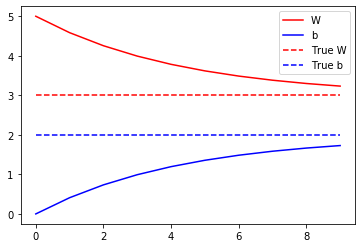

In [21]:
plt.plot(epochs, Ws, 'r',
         epochs, bs, 'b')
plt.plot([TRUE_W] * len(epochs), 'r--',
         [TRUE_b] * len(epochs), 'b--')
plt.legend(['W', 'b', 'True W', 'True b'])
plt.show()